In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')

In [123]:
df = pd.read_csv("heart.csv")
print(" Data loaded successfully!")
df.head()

 Data loaded successfully!


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [124]:
df.shape

(1025, 14)

In [125]:
print("\nDataset Info:\n")
df.info()


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [126]:
# TO GET STATISTICAL INFO ABOUT DATAFRAME
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [127]:
pd.crosstab(df['target'], df['sex'])


sex,0,1
target,,
0,86,413
1,226,300


In [128]:
# CHECK MISSING VALUES
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [129]:
#CORRELATION MATRIX
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


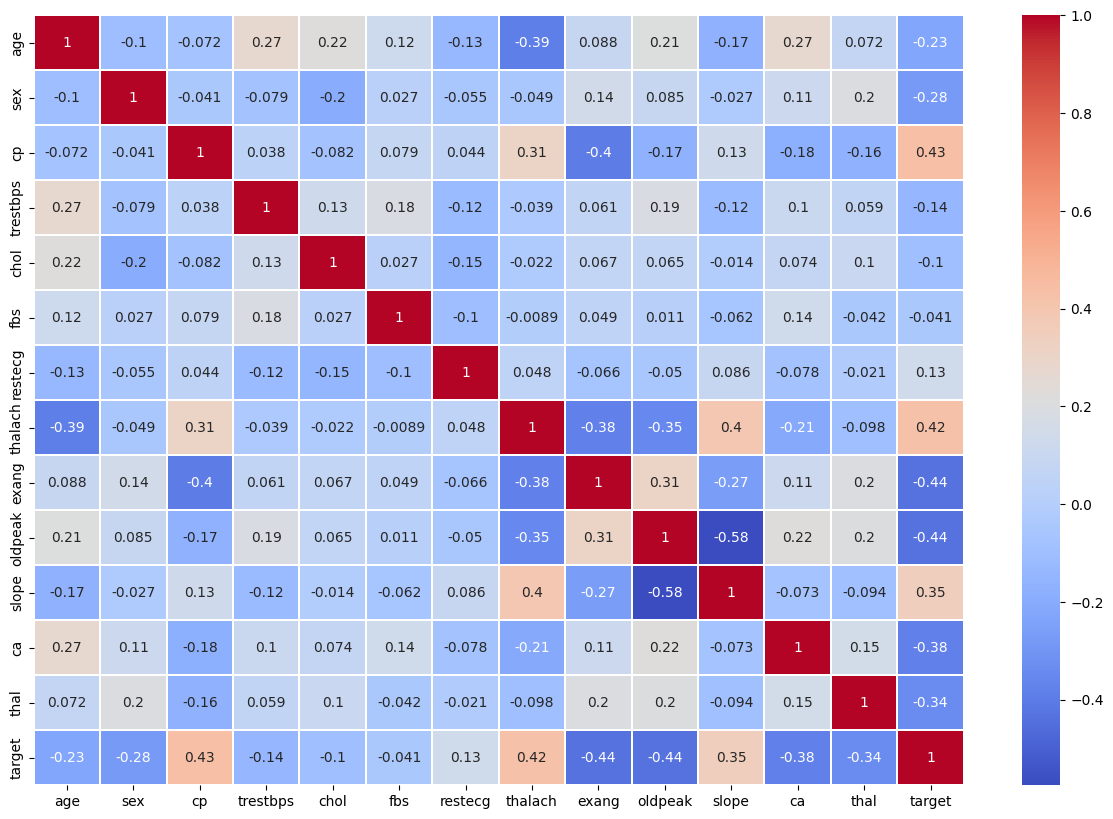

In [130]:
#CREATE A HEATMAP TAKING CORRELATION MATRTIX

plt.figure(figsize=(15,10 ))
sns.heatmap(df.corr(),linewidths=0.01,annot=True,cmap="coolwarm")
plt.show()

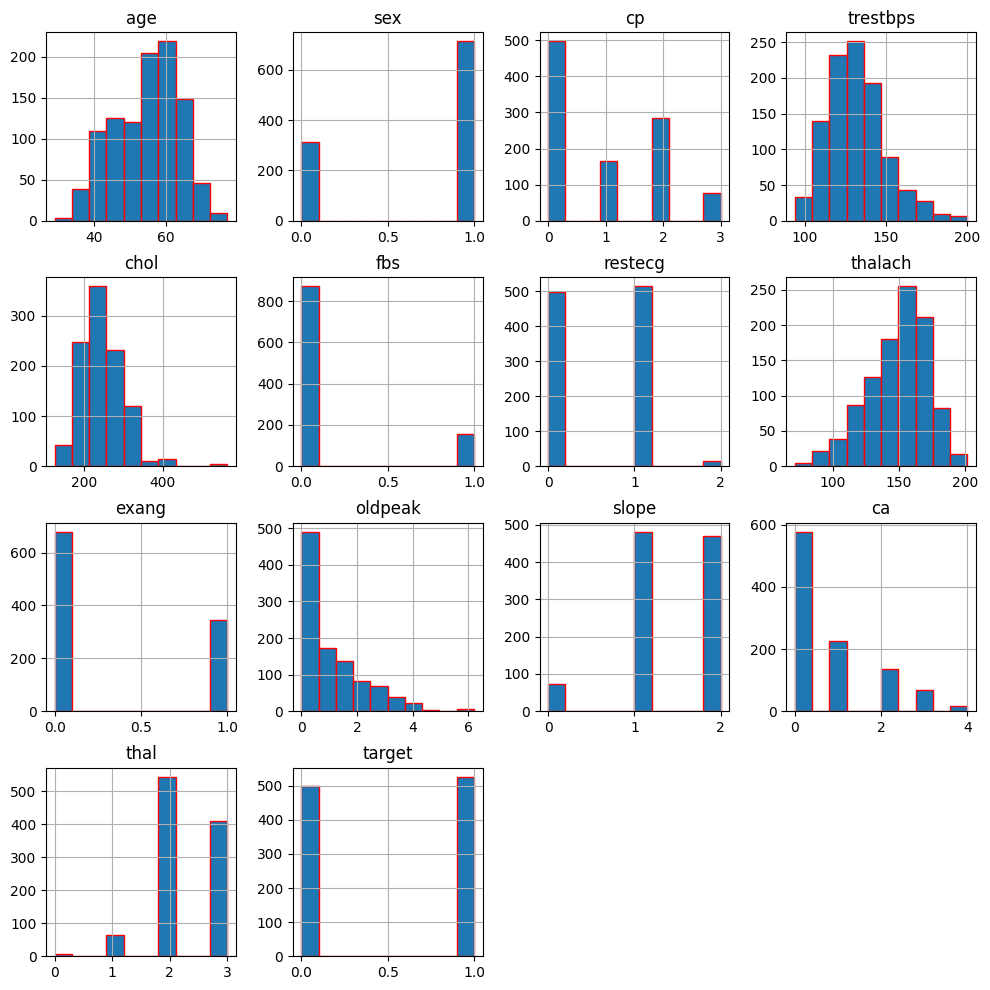

In [131]:
#CREATE A HISTOGRAM
df.hist(figsize=(12,12),edgecolor='r')
plt.savefig('featuresplot')

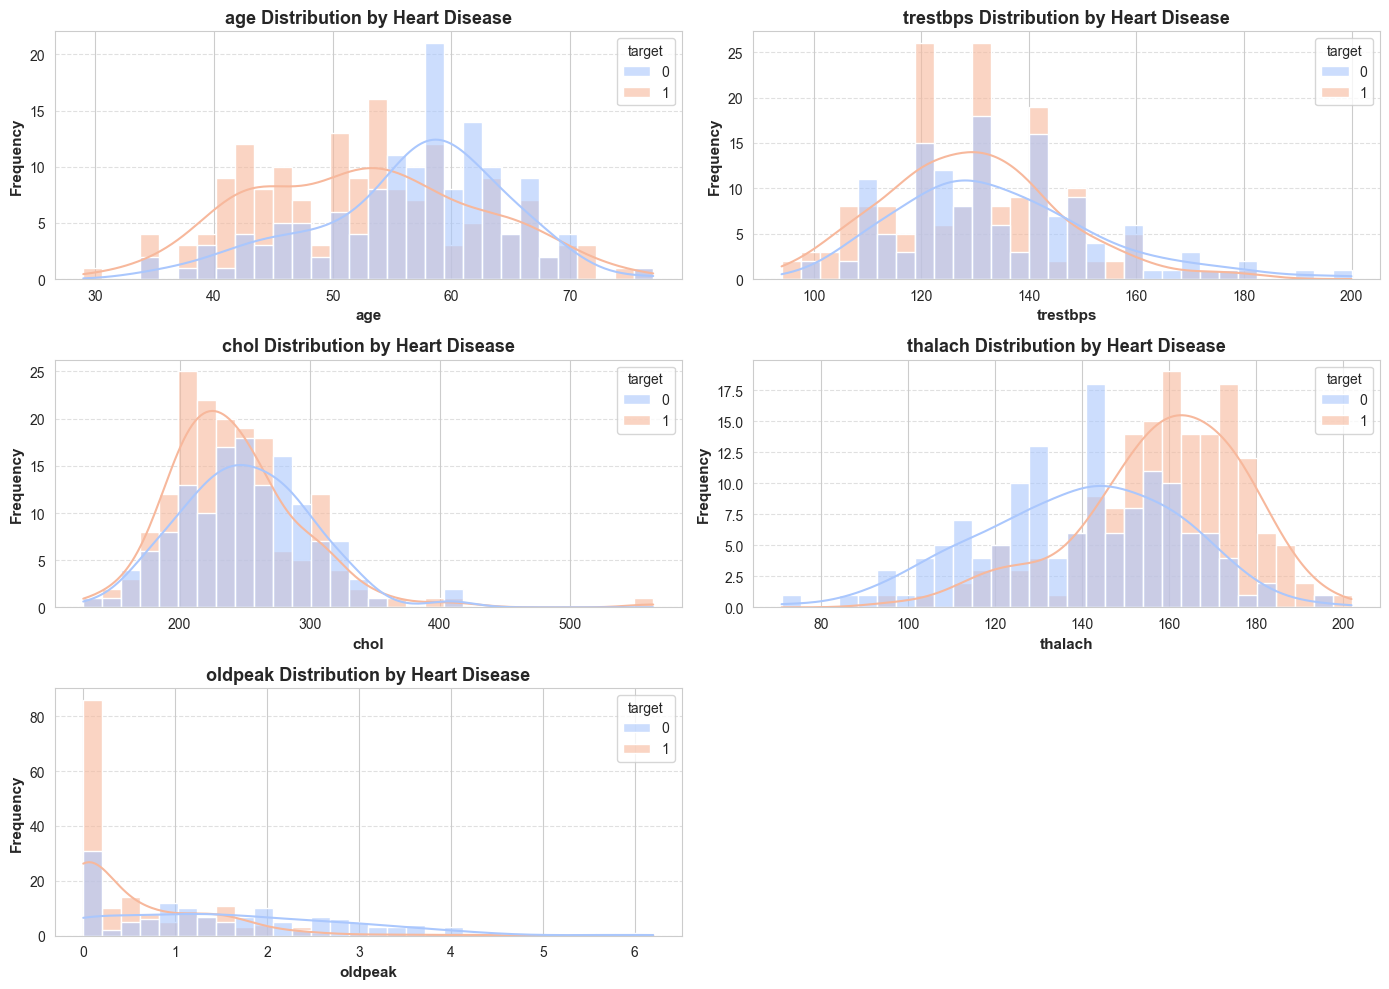

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
sns.set_style("whitegrid")
sns.set_palette("coolwarm")
plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(
        data=df,
        x=col,
        hue='target',
        kde=True,
        bins=30,
        palette="coolwarm",
        alpha=0.6
    ) 
    plt.title(f"{col} Distribution by Heart Disease", fontsize=13, weight='bold')
    plt.xlabel(col, fontsize=11, weight='bold')
    plt.ylabel("Frequency", fontsize=11, weight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


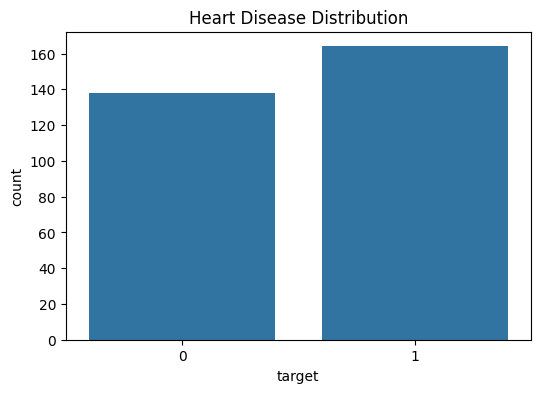

In [243]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution")
plt.show()


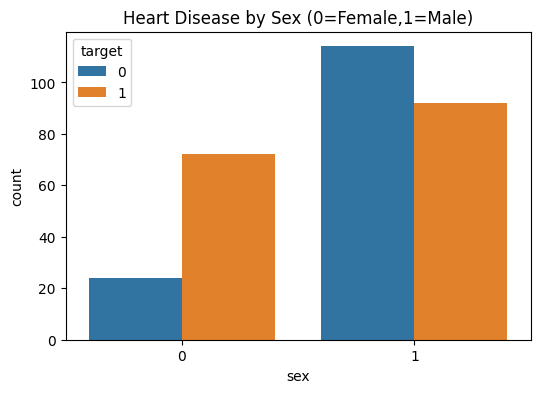

In [242]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='target', data=df)
plt.title("Heart Disease by Sex (0=Female,1=Male)")
plt.show()

In [ ]:
#DELETING DUBLICATE VALUES

df = df.drop_duplicates()
print("Total rows after removing duplicates:", len(df))

Total rows after removing duplicates: 302


In [188]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [189]:
#SPLIT DATASET INTO TRAINING AND TESTING DATA
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=42)

In [231]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
245,44,1,1,130,219,0,0,188,0,0.0,2,0,2
349,62,0,2,130,263,0,1,97,0,1.2,1,1,3
135,58,0,0,170,225,1,0,146,1,2.8,1,2,1
389,63,1,3,145,233,1,0,150,0,2.3,0,0,1
66,53,1,2,130,197,1,0,152,0,1.2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,63,0,2,135,252,0,0,172,0,0.0,2,0,2
438,47,1,2,130,253,0,1,179,0,0.0,2,0,2
60,29,1,1,130,204,0,0,202,0,0.0,2,0,2
377,64,0,0,130,303,0,1,122,0,2.0,1,2,2


In [230]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
23     1
438    1
60     1
377    1
140    0
Name: target, Length: 76, dtype: int64

In [229]:
#CREATE LOGISTIC REGRESSION MODEL
model= LogisticRegression()
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [232]:
y_prediction=model.predict(x_test)
print(y_prediction)

[1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1
 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1
 0 0]


In [233]:
lr_acc = accuracy_score(y_test, y_prediction) * 100
print(f"Logistic Regression Accuracy: {lr_acc:.2f}%")


Logistic Regression Accuracy: 81.58%


In [195]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_prediction)
print(cm)

[[29 11]
 [ 3 33]]


In [196]:
A=cm[0][0]
B=cm[1][1]
C=cm[1][0]
D=cm[0][1]

In [197]:
print("Accuracy:",(A+B)/(A+B+C+D))
print("Precision:",(A/(A+D)))
print("Sensivity:",(A/(A+C)))
print("Specificity:",(B/(B+D)))

Accuracy: 0.8157894736842105
Precision: 0.725
Sensivity: 0.90625
Specificity: 0.75


In [198]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_prediction))


              precision    recall  f1-score   support

           0       0.91      0.72      0.81        40
           1       0.75      0.92      0.82        36

    accuracy                           0.82        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.82      0.81        76



COMPARISON OF LOGISTIC REGRESSION WITH :
                                        RANDOM FOREST
                                        SVM
                                        KNN
                                        Decision Tree

In [221]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
rf_acc = accuracy_score(y_test, y_pred_rf)*100
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf) * 100:.2f}%")


Random Forest Accuracy: 80.26%


In [222]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
dt_acc = accuracy_score(y_test, y_pred_dt) *100
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt) * 100:.2f}%")


Decision Tree Accuracy: 75.00%


In [ ]:
#SVM
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=42)
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
svm_acc = accuracy_score(y_test, y_pred_svm) *100
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm) * 100:.2f}%")


SVM Accuracy: 75.00%


In [223]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
knn_acc = accuracy_score(y_test, y_pred_knn) *100
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn) * 100:.2f}%")


KNN Accuracy: 63.16%


Model Accuracy Comparison:

Logistic Regression: 81.58%
Random Forest: 80.26%
Decision Tree: 75.00%
SVM: 75.00%
KNN: 63.16%


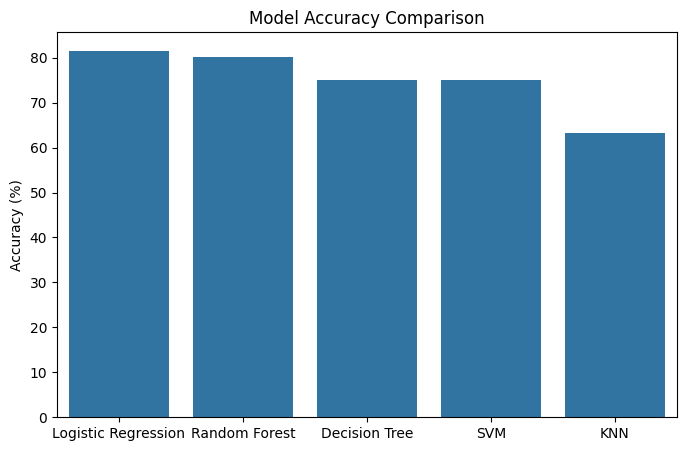

In [224]:
import seaborn as sns

# Combine all model accuracies
scores = {
    "Logistic Regression": lr_acc,
    "Random Forest": rf_acc,
    "Decision Tree": dt_acc,
    "SVM": svm_acc,
    "KNN": knn_acc
}

# Display scores
print("Model Accuracy Comparison:\n")
for model, acc in scores.items():
    print(f"{model}: {acc:.2f}%")

# Plot accuracy comparison
plt.figure(figsize=(8,5))
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.show()


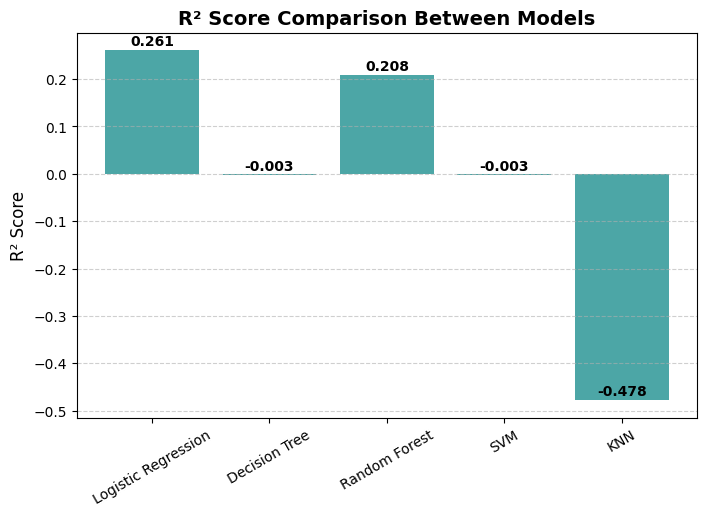

In [234]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Calculate R² for all models
r2_scores = {
    "Logistic Regression": r2_score(y_test, y_prediction),
    "Decision Tree": r2_score(y_test, y_pred_dt),
    "Random Forest": r2_score(y_test, y_pred_rf),
    "SVM": r2_score(y_test, y_pred_svm),
    "KNN": r2_score(y_test, y_pred_knn)
}

# Create bar chart
plt.figure(figsize=(8,5))
plt.bar(r2_scores.keys(), r2_scores.values(), color='teal', alpha=0.7)

# Add labels
plt.title("R² Score Comparison Between Models", fontsize=14, fontweight='bold')
plt.ylabel("R² Score", fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display values on top of bars
for i, v in enumerate(r2_scores.values()):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center', fontweight='bold')

plt.show()


In [235]:
#FINAL MODEL IMPLEMENTATION

input =(54,1,0,122,286,0,0,116,1,3.2,1,2,2)
arr1=np.asarray(input)
print(arr1)
arr2 = arr1.reshape(1,-1)
print(arr2)

[ 54.    1.    0.  122.  286.    0.    0.  116.    1.    3.2   1.    2.
   2. ]
[[ 54.    1.    0.  122.  286.    0.    0.  116.    1.    3.2   1.    2.
    2. ]]


In [236]:
y_prediction = model.predict(arr2)
if(y_prediction==1):
    print(" THE PATIENT HAVING HEART DISEASE")
else:
    print(" THE PATIENT HAVING NO HEART DISEASE")

 THE PATIENT HAVING NO HEART DISEASE
